In [8]:
import pandas as pd

# 📌 Ruta del archivo original
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\final_df.csv"

# 📌 Ruta donde guardaremos el archivo reducido
output_path = r"C:/Users/solan/Downloads/get_data_from_songs/src/clean_df_reduced.csv"

# 📌 Cargar el dataset
df = pd.read_csv(file_path)

# 📌 Seleccionar solo las columnas esenciales
columns_to_keep = ["recording_id", "artist_name", "song_name", "spotify_url", "processed_lyrics", "combined_genres", "playlists_names"]

df_reduced = df[columns_to_keep]

# 📌 Guardar el archivo reducido
df_reduced.to_csv(output_path, index=False)

print(f"✅ Archivo reducido guardado en: {output_path}")


✅ Archivo reducido guardado en: C:/Users/solan/Downloads/get_data_from_songs/src/clean_df_reduced.csv


In [10]:
import pandas as pd
import numpy as np

# Cargar el archivo procesado
file_path = "/mnt/data/clean_df_part_1_processed.csv"
df = pd.read_csv(file_path)

# Definir el número de partes
num_parts = 5  # Se puede ajustar según la necesidad

# Dividir el DataFrame en partes
chunk_size = len(df) // num_parts
file_paths = []

for i in range(num_parts):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if i != num_parts - 1 else len(df)
    chunk_df = df.iloc[start_idx:end_idx]

    # Guardar la parte en un archivo separado
    chunk_file_path = f"/mnt/data/clean_df_part_1_processed_part_{i+1}.csv"
    chunk_df.to_csv(chunk_file_path, index=False)
    file_paths.append(chunk_file_path)

file_paths


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/clean_df_part_1_processed.csv'

In [11]:
%pip install summa

import pandas as pd
from summa import summarizer

# Cargar el dataframe
df = pd.read_csv('clean_df_part_1.csv', encoding='ascii')

# Función para resumir la letra en forma humana utilizando summa.summarizer

def human_summary(lyrics):
    if isinstance(lyrics, str) and len(lyrics.split()) > 50:
        try:
            summary = summarizer.summarize(lyrics, ratio=0.3)
            if summary.strip() == '':
                return 'No se pudo generar un resumen efectivo.'
            return summary
        except Exception as e:
            return 'Error al resumir: ' + str(e)
    else:
        return 'Texto insuficiente para resumir.'

# Aplicar la función a la columna 'processed_lyrics'
if 'processed_lyrics' in df.columns:
    df['lyrics_summary'] = df['processed_lyrics'].apply(human_summary)
    print(df[['processed_lyrics', 'lyrics_summary']].head())
else:
    print('La columna processed_lyrics no se encuentra en el dataframe')

# Guardar el dataframe modificado
output_filename = 'clean_df_part_1_with_human_summary.csv'
df.to_csv(output_filename, index=False)
print('Archivo modificado guardado como ' + output_filename)


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/54.9 kB ? eta -:--:--
     -------------- ----------------------- 20.5/54.9 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 54.9/54.9 kB 572.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54410 sha256=e3c0b4a005aca16199f600d9b01965bf50c29db969d48c70bb695e281d93bccd
  Stored in directory: c:\users\solan\appdata\local\pip\cache\wheels\10\2d\7a\abce87c4ea233f8dcca0d99b740ac0257eced1f99a124a0e1f
Successfully built summa
Note: you may need to restart the kernel to use updated packages.


FileNotFoundError: [Errno 2] No such file or directory: 'clean_df_part_1.csv'

In [9]:
import pandas as pd
import os

# 📌 Ruta del dataset original
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\clean_df_reduced.csv"

# 📌 Directorio donde se guardarán las partes divididas
output_dir = r"C:\Users\solan\Downloads\get_data_from_songs\src\split_files"
os.makedirs(output_dir, exist_ok=True)  # Crear el directorio si no existe

# 📌 Cargar el dataset
df = pd.read_csv(file_path)

# 📌 Definir el tamaño de cada parte
chunk_size = 5000  # Cada bloque tendrá 5000 canciones

# 📌 Dividir el dataset en partes y guardarlas
for i, chunk in enumerate(range(0, len(df), chunk_size)):
    df_chunk = df.iloc[chunk:chunk + chunk_size]  # Extraer la parte correspondiente
    output_file = os.path.join(output_dir, f"clean_df_part_{i+1}.csv")  # Crear nombre de archivo
    df_chunk.to_csv(output_file, index=False)  # Guardar la parte
    print(f"✅ Guardado: {output_file}")

print("🚀 Dataset dividido en partes de 5000 canciones correctamente.")


✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_1.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_2.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_3.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_4.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_5.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_6.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_7.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_8.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_9.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_files\clean_df_part_10.csv
✅ Guardado: C:\Users\solan\Downloads\get_data_from_songs\src\split_fi

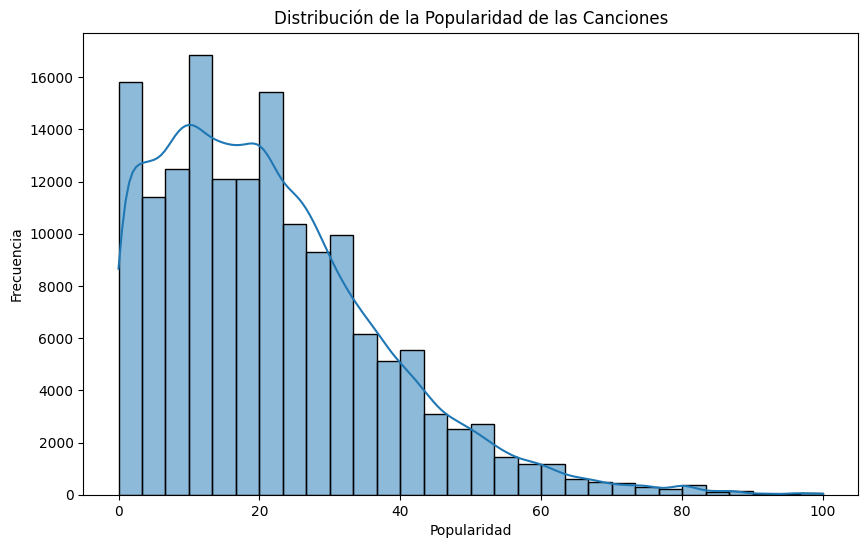

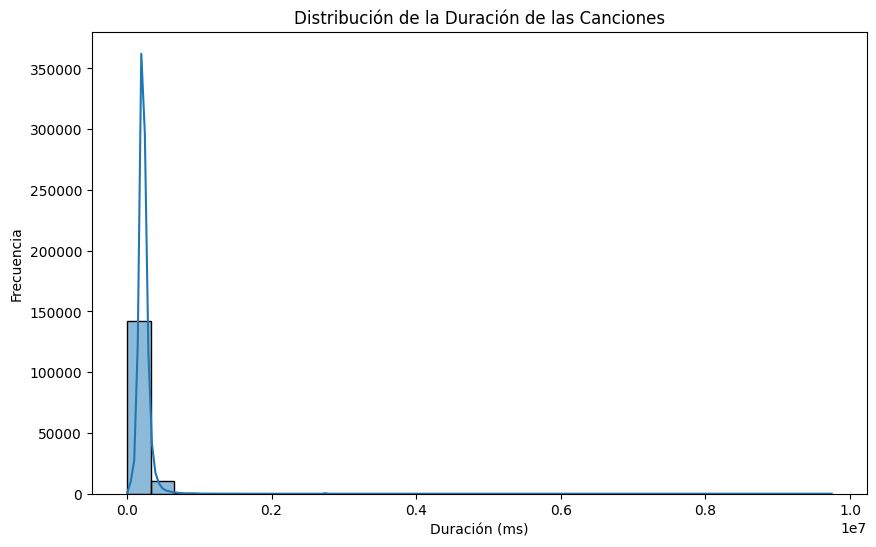

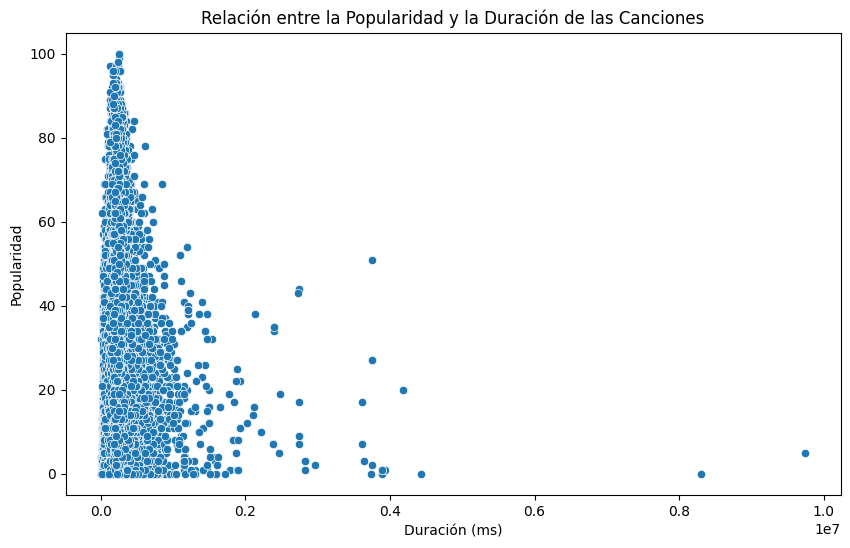

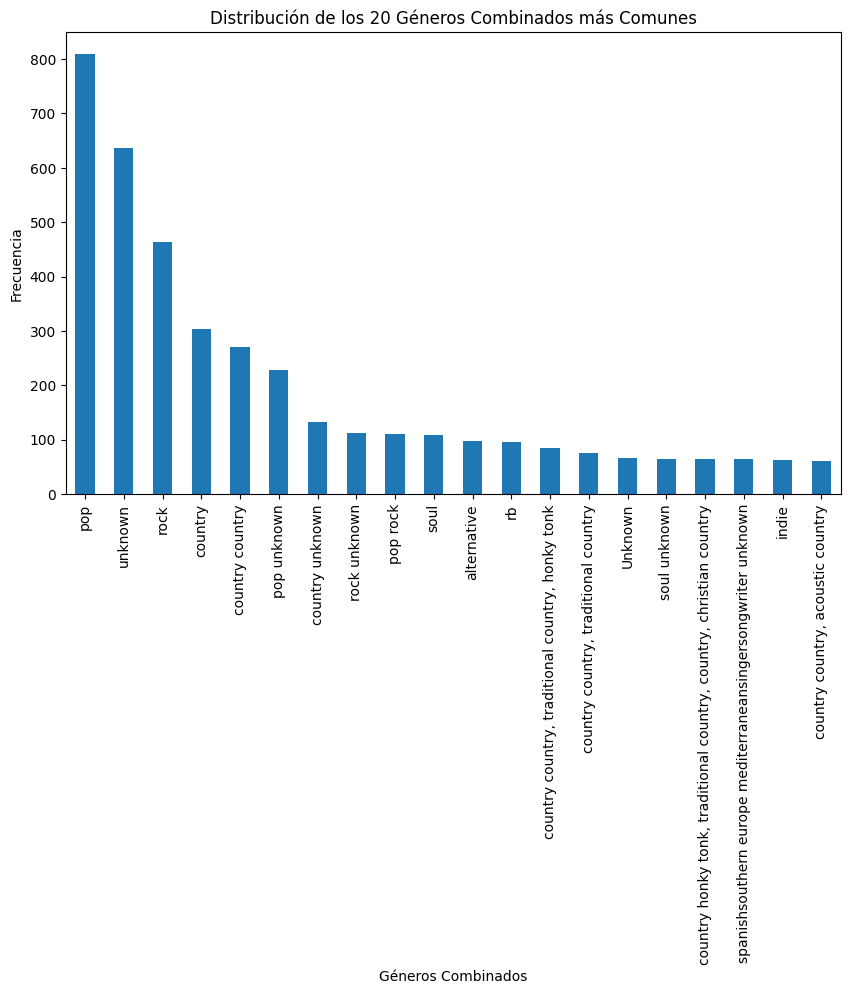

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# Distribución de la popularidad de las canciones
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la duración de las canciones
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Duración de las Canciones')
plt.xlabel('Duración (ms)')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre la popularidad y la duración de las canciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_ms', y='popularity', data=df)
plt.title('Relación entre la Popularidad y la Duración de las Canciones')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.show()

# Distribución de géneros combinados
plt.figure(figsize=(10, 6))
df['combined_genres'].value_counts().head(20).plot(kind='bar')
plt.title('Distribución de los 20 Géneros Combinados más Comunes')
plt.xlabel('Géneros Combinados')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [9]:
#ver todo el contenido de las celdas, columnas y filas
pd.set_option('display.max_colwidth', None)

PRUEBA +

In [53]:
import pandas as pd

# Cargar el DataFrame
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto.csv"
df = pd.read_csv(file_path)
df[['artist_name', 'song_name', 'language', 'lyrics', 'translated_lyrics']].sample(5)


,artist_name,song_name,language,lyrics,translated_lyrics
142454,philipp poisel,markt und fluss,de,strophe 1 morgens in den nebel schauend mich fragend wo das leben bleibt tee trinkend und schwarzbrot kauend zhl ich die tage grostadtschluchten ziehen mich ein es klappert hier und da ich bilde mir zu leben ein im rinnstein stirbt ein schwein refrain ich hab ja meinen markt und meinen fluss ber den ich jeden morgen geh strophe 2 in bahnhofshallen gro und kalt trum ich von dem sommerwald ich geh auf die strae raus wohin fahren die zge refrain,verse 1 in the morning looking into the fog wondering where life is drinking tea and chewing black bread I count the days big city canyons draw me in it clatters here and there I imagine I'm living a pig dies in the gutter chorus I have my market and my river that I walk over every morning verse 2 in train station halls big and cold I dream of the summer forest I go out onto the street where do the trains go chorus
73728,tori kelly,unbreakable smile,en,chorus it aint a dream its really what it seems gotta get that moolah fore you end up on a t shoutout to that lil nigga got hit up at 16 its a shame he aint get to live his dream you can win or lose when you thuggin in these streets i wont make a move without my gun by any means i heard they lookin but aint never where i be but nigga when we meet yea we gon see ah youngboy verse 1 i heard that they comin you know i aint runnin im on top my city they wont put me under everyday shit get gutter so i keep a burner called me at the corner shoulda listened to my fuckin number from the bottom of the barrel i came out runnin 100 shots on the bottom of the barrel aint no fuckin runner told lies they wasnt loyal or they wasnt 100 soon as we touch they gon get touched keep that on the under watch what you say cause when you say it its gon hit the streets ready for to go to war with whoever want it with me you gon die for speakin on a nigga put money on me they could try watch how many die right before i leave extendo tote em a lotta shit come with the game i seen niggas change i seen bitches change i fuck with dino yeah the real flame send mckayla up a corner and aint want a thang i do this shit for my lil brudda cant forget the gang gettin to that paper got more players in nba tell em freaky dogs got that cage open up your eyes this shit aint a game chorus it aint a dream its really what it seems gotta get that moolah fore you end up on a t shoutout to that lil nigga got hit up at 16 its a shame he aint get to live his dream you can win or lose when you thuggin in these streets i wont make a move without my gun by any means i heard they lookin but aint never where i be but nigga when we meet yea we gon see ah verse 2 man this shit get wicked you can get it i stay with that hammer i cant let you kill me open fire im forever lasting them lil boys shot at me the other day i gotta bam em pull up where i saw em trappin that power i work that hammer real diamond round my neck lil nigga i dare you to snatch em you know that the gang dont spare em you know that we gotta stab em all these hoes surround us young niggas who made it happen these niggas they hate on us but bitch nigga know they can have it chorus it aint a dream its really what it seems gotta get that moolah fore you end up on a t shoutout to that lil nigga got hit up at 16 its a shame he aint get to live his dream you can win or lose when you thuggin in these streets i wont make a move without my gun by any means i heard they lookin but aint never where i be but nigga when we meet yea we gon see ah look,NaN
57938,destroyer,del monton,es,cerca fue del castillo el de san sebastián de las barcas que amarran a la orilla del mar nunca tú me quisiste yo vi ponerse el sol calabaza gigante ay qué miedo me dio pudo ser un amor del montón pero todo el montón era mío y perdí la cabeza y toqué pronto fondo y se fue un pescador al son del cante jondo yo miraba al castillo y me creía franz kafka y escribí una can

In [54]:
# Crear una columna 'processed_lyrics' que contenga las letras en inglés o traducidas
df['processed_lyrics'] = df.apply(lambda row: row['lyrics'] if row['language'] == 'en' else row['translated_lyrics'], axis=1)

In [55]:
import re

# Función para limpiar y normalizar las letras
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Aplicar la función de limpieza a la columna 'processed_lyrics'
df['processed_lyrics'] = df['processed_lyrics'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

In [56]:
# Verificar que la columna 'processed_lyrics' se haya creado correctamente
print(df[['artist_name', 'song_name', 'language', 'processed_lyrics']].head())

         artist_name                  song_name language  \
0   anthony hamilton          change your world       en   
1  adriano celentano                 rock matto       it   
2   jedi mind tricks  poison in the birth water       en   
3           buckshot                 we in here       en   
4            g herbo                     street       en   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [57]:
# Guardar el DataFrame actualizado en un nuevo archivo CSV
output_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto_processed.csv"
df.to_csv(output_path, index=False)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Vectorizar las letras
vectorizer = TfidfVectorizer(max_features=20000, stop_words='english')
X = vectorizer.fit_transform(df['processed_lyrics'].dropna())

# Guardar el vectorizador y la matriz de características
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('lyrics_matrix.pkl', 'wb') as f:
    pickle.dump(X, f)

In [62]:
import pandas as pd
from deep_translator import GoogleTranslator
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Cargar el vectorizador y la matriz de características
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
with open('lyrics_matrix.pkl', 'rb') as f:
    X = pickle.load(f)

# Cargar el DataFrame
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto_processed.csv"
df = pd.read_csv(file_path)

# Función para buscar canciones basadas en un tema
def search_songs(topic):
    translator = GoogleTranslator(source="auto", target="en")
    topic_en = translator.translate(topic)
    
    # Vectorizar el tema ingresado
    topic_vector = vectorizer.transform([topic_en])
    
    # Calcular la similitud de coseno
    similarities = cosine_similarity(topic_vector, X).flatten()
    
    # Obtener los índices de las 5 canciones más similares
    top_indices = similarities.argsort()[-5:][::-1]
    
    # Obtener las canciones correspondientes
    top_songs = df.iloc[top_indices]
    
    return top_songs

# Ejemplo de uso
topic = "estoy sola junto al mar"
top_songs = search_songs(topic)
top_songs[['artist_name', 'song_name', 'spotify_url', 'processed_lyrics']]

,artist_name,song_name,spotify_url,processed_lyrics
88196,open mike eagle,easter surgery,https://open.spotify.com/track/69kJJSSKZ7kYPhEaLdXYBb,verse 1 started life as a christian i was enticed by religion to spark a spiritual life that was missing as an acolyte a white jesus had me actin right chasing the thoughts of an after life so i attended service like clockwork sundays best and socks from the top drawer but jesus wasnt the reason for my oxfords i mostly went for this girl i had the hots for verse 2 whenever i was kinda bored thoughts of the girl i adored ignite a war haunted by the angry white jesus by the door natural impulses i strive to ignore i was divided to the core the ageold battle between human anatomy vs science of the lord i came real close to leaving my burdens by the door until i asked the preacher man about the dinosaurs hook jefferson dejesus it seems if we lie will we lay there beside it they say that its right but it doesnt seem righteous verse 3 serengeti she didnt really wanna get botox really she rather vowed against it but opportunity arose it would increase her chances to get this gig her manager said im not saying anything but we could really use it right now besides whats the big deal everybody does it we need the work and as i face it everybody hires once we gotta play the game were married to a different fuckin custom a pioneer of something new thats a lotta work to do i personally i dont think that you got it in you to champion a new cause you look really good in draws sometimes you gotta follow fuckin laws and shit bridge jefferson dejesus they rival the stars and they all fight with lightning we sit by the fire and conspire here in silence hook
114810,shawn mendes,show you,https://open.spotify.com/track/6E0U3OTvJwFvc8rmTqZiBK,verse 1 you cant walk the streets at night youre way too short to get on this ride no im not no im not theyre tryna tell me that i i gotta be home when the street lights glow you cant watch your tv show i will watch what i wanna watch no i wont listen to you do what i wanna do chorus and i will walk this road ahead one hundred miles on my hands do i need to show you guess i gotta show you and if you dont believe me now ill flip the whole world upside down do i need to show you guess i gotta show you verse 2 watch me swim across this lake fly through the sky in my superman cape watch me walk across this wire tip toe through the coals of a blazing fire watch me fly this kite in the rain ill jump rope with my ball and chain come by and knock on my house of cards if it falls i will build it from the start i wont listen to you do what i wanna do chorus and i will walk this road ahead one hundred miles on my hands do i need to show you guess i gotta show you and if you dont believe me now ill flip the whole world upside down do i need to show you guess i gotta show you verse 3 do i really gotta show you now really really gotta show you now do i really gotta spell it out it i spelled it out do you really wanna see me now watch me walk across the clouds i dont know what you heard about listen to me yell it loud do i really gotta show you now really really gotta show you now do i really gotta spell it out it i spelled it out do you really wanna see me now watch me walk across the clouds i dont know what you heard about see that door ill knock it down chorus and i will walk this road ahead one hundred miles on my hands do i need to show you guess i gotta show you and if you dont believe me now ill flip the whole world upside down do i need to show you guess i gotta show you outro do i really gotta show you now really really gotta show you now do i really gotta spell it out it i spelled it out do you really wanna see me now watch me walk across the clouds do i need to show you guess i gotta show you
92248,jodeci,dj don jeremy,https://open.spotify.com/track/2OfzQqp2SbCcI6P61KKWmu,yes uh that was uh pump it back by uh jodeci uh youre cruisin down on the quiet storm with uh double e j

In [63]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Cargar el DataFrame
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto.csv"
df = pd.read_csv(file_path)

# Crear una columna 'processed_lyrics' que contenga las letras en inglés o traducidas
df['processed_lyrics'] = df.apply(lambda row: row['lyrics'] if row['language'] == 'en' else row['translated_lyrics'], axis=1)

# Función para limpiar y normalizar las letras
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Aplicar la función de limpieza a la columna 'processed_lyrics'
df['processed_lyrics'] = df['processed_lyrics'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

# Verificar que la columna 'processed_lyrics' se haya creado correctamente
print(df[['artist_name', 'song_name', 'language', 'processed_lyrics']].head())

# Guardar el DataFrame actualizado en un nuevo archivo CSV
output_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto_processed.csv"
df.to_csv(output_path, index=False)

         artist_name                  song_name language  \
0   anthony hamilton          change your world       en   
1  adriano celentano                 rock matto       it   
2   jedi mind tricks  poison in the birth water       en   
3           buckshot                 we in here       en   
4            g herbo                     street       en   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Vectorizar las letras
vectorizer = TfidfVectorizer(max_features=100000, stop_words='english')
X = vectorizer.fit_transform(df['processed_lyrics'].dropna())

# Guardar el vectorizador y la matriz de características
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('lyrics_matrix.pkl', 'wb') as f:
    pickle.dump(X, f)

In [66]:
import pandas as pd
from deep_translator import GoogleTranslator
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Cargar el vectorizador y la matriz de características
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
with open('lyrics_matrix.pkl', 'rb') as f:
    X = pickle.load(f)

# Cargar el DataFrame
df = pd.read_csv(output_path)

# Función para buscar canciones basadas en un tema
def search_songs(topic):
    translator = GoogleTranslator(source="auto", target="en")
    topic_en = translator.translate(topic)
    
    # Vectorizar el tema ingresado
    topic_vector = vectorizer.transform([topic_en])
    
    # Calcular la similitud de coseno
    similarities = cosine_similarity(topic_vector, X).flatten()
    
    # Obtener los índices de las 5 canciones más similares
    top_indices = similarities.argsort()[-5:][::-1]
    
    # Obtener las canciones correspondientes
    top_songs = df.iloc[top_indices]
    
    return top_songs

# Ejemplo de uso
topic = "pedir matrimonio a mi novia"
top_songs = search_songs(topic)
print(top_songs[['artist_name', 'song_name', 'spotify_url', 'processed_lyrics']])

               artist_name                               song_name  \
61020    my morning jacket                           strangulation   
88522           architects                           broken clocks   
94155              dewa 19  perasaanku tentang perasaanku kepadamu   
143463                earl                             tongue tied   
44109   bj the chicago kid                              the resume   

                                                  spotify_url  \
61020   https://open.spotify.com/track/0a6xDMYLK0J2X4feY196kH   
88522   https://open.spotify.com/track/6jYCmW6yIh9NujlmuDWSXs   
94155   https://open.spotify.com/track/2Q1PyPAHEZ66Wo2nPxMZ3k   
143463  https://open.spotify.com/track/6UVoBPnPm0Q0i56Dy3PLQL   
44109   https://open.spotify.com/track/0JP0Rpqnmllnk2QQ5L8h8O   

                                                                                                                                                                                            

BERT

In [67]:
import pandas as pd
import re
from transformers import BertTokenizer, BertModel
import torch

# Cargar el DataFrame
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto.csv"
df = pd.read_csv(file_path)

# Crear una columna 'processed_lyrics' que contenga las letras en inglés o traducidas
df['processed_lyrics'] = df.apply(lambda row: row['lyrics'] if row['language'] == 'en' else row['translated_lyrics'], axis=1)

# Función para limpiar y normalizar las letras
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Aplicar la función de limpieza a la columna 'processed_lyrics'
df['processed_lyrics'] = df['processed_lyrics'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

# Verificar que la columna 'processed_lyrics' se haya creado correctamente
print(df[['artist_name', 'song_name', 'language', 'processed_lyrics']].head())

# Guardar el DataFrame actualizado en un nuevo archivo CSV
output_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto_processed.csv"
df.to_csv(output_path, index=False)

         artist_name                  song_name language  \
0   anthony hamilton          change your world       en   
1  adriano celentano                 rock matto       it   
2   jedi mind tricks  poison in the birth water       en   
3           buckshot                 we in here       en   
4            g herbo                     street       en   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [68]:
from transformers import BertTokenizer, BertModel
import torch

# Cargar el modelo y el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Función para obtener embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings

# Obtener embeddings para todas las letras
df['embeddings'] = df['processed_lyrics'].apply(lambda x: get_bert_embeddings(x) if pd.notnull(x) else None)

# Guardar los embeddings
df.to_pickle('lyrics_embeddings.pkl')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\solan\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\solan\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch

# Cargar el modelo y el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Cargar el DataFrame con los embeddings
df = pd.read_pickle('lyrics_embeddings.pkl')

# Función para obtener embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings

# Función para buscar canciones basadas en un tema
def search_songs(topic):
    translator = GoogleTranslator(source="auto", target="en")
    topic_en = translator.translate(topic)
    
    # Obtener embeddings para el tema ingresado
    topic_embeddings = get_bert_embeddings(topic_en)
    
    # Calcular la similitud de coseno
    similarities = cosine_similarity(topic_embeddings, np.vstack(df['embeddings'].dropna().values)).flatten()
    
    # Obtener los índices de las 5 canciones más similares
    top_indices = similarities.argsort()[-5:][::-1]
    
    # Obtener las canciones correspondientes
    top_songs = df.iloc[top_indices]
    
    return top_songs

# Ejemplo de uso
topic = "arte y cultura"
top_songs = search_songs(topic)
print(top_songs[['artist_name', 'song_name', 'spotify_url', 'processed_lyrics']])

prueba bert

In [76]:
import pandas as pd

# Cargar el DataFrame completo
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto.csv"
df = pd.read_csv(file_path)

# Seleccionar una muestra aleatoria de 1,000 canciones
sample_df = df.sample(n=10000, random_state=42)

# Guardar la muestra en un nuevo archivo CSV
sample_output_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_sample.csv"
sample_df.to_csv(sample_output_path, index=False)

In [77]:
import pandas as pd
import re
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# Cargar el DataFrame de la muestra
sample_df = pd.read_csv(sample_output_path)

# Crear una columna 'processed_lyrics' que contenga las letras en inglés o traducidas
sample_df['processed_lyrics'] = sample_df.apply(lambda row: row['lyrics'] if row['language'] == 'en' else row['translated_lyrics'], axis=1)

# Función para limpiar y normalizar las letras
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Aplicar la función de limpieza a la columna 'processed_lyrics'
sample_df['processed_lyrics'] = sample_df['processed_lyrics'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

# Verificar que la columna 'processed_lyrics' se haya creado correctamente
print(sample_df[['artist_name', 'song_name', 'language', 'processed_lyrics']].head())

# Guardar el DataFrame actualizado en un nuevo archivo CSV
sample_output_path_processed = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_sample_processed.csv"
sample_df.to_csv(sample_output_path_processed, index=False)

        artist_name             song_name language  \
0   run river north          superstition       en   
1     kool the gang          just be true       en   
2  trevor something           procreation       en   
3       silverstein  we are not the world       en   
4     manuel turizo      una lady como tu       en   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [78]:
# Cargar el modelo y el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Función para obtener embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings

# Procesar las letras en lotes
batch_size = 32
embeddings = []

for i in tqdm(range(0, len(sample_df), batch_size)):
    batch_texts = sample_df['processed_lyrics'].iloc[i:i+batch_size].tolist()
    batch_texts = [text for text in batch_texts if isinstance(text, str)]  # Filtrar valores no string
    batch_embeddings = [get_bert_embeddings(text) for text in batch_texts]
    embeddings.extend(batch_embeddings)

# Agregar los embeddings al DataFrame
sample_df = sample_df.iloc[:len(embeddings)]  # Asegurarse de que el DataFrame tenga la misma longitud que los embeddings
sample_df['embeddings'] = embeddings

# Guardar los embeddings
sample_df.to_pickle('lyrics_embeddings_sample.pkl')

100%|██████████| 313/313 [24:54<00:00,  4.77s/it]


In [85]:
import pandas as pd
from deep_translator import GoogleTranslator
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch

# Cargar el modelo y el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Cargar el DataFrame con los embeddings
sample_df = pd.read_pickle('lyrics_embeddings_sample.pkl')

# Función para obtener embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings

# Función para buscar canciones basadas en un tema
def search_songs(topic):
    translator = GoogleTranslator(source="auto", target="en")
    topic_en = translator.translate(topic)
    
    # Obtener embeddings para el tema ingresado
    topic_embeddings = get_bert_embeddings(topic_en)
    
    # Calcular la similitud de coseno
    similarities = cosine_similarity(topic_embeddings, np.vstack(sample_df['embeddings'].dropna().values)).flatten()
    
    # Obtener los índices de las 5 canciones más similares
    top_indices = similarities.argsort()[-5:][::-1]
    
    # Obtener las canciones correspondientes
    top_songs = sample_df.iloc[top_indices]
    
    return top_songs

# Ejemplo de uso
topic = "felicidad y baile"
top_songs = search_songs(topic)
top_songs[['artist_name', 'song_name', 'spotify_url', 'processed_lyrics']]

,artist_name,song_name,spotify_url,processed_lyrics
854,juelz santana,rumble young man rumble,https://open.spotify.com/track/75cVyLquQE44NFI15VVobY,juelz santana juelz santana aint no turning back from here thats right verse 1 i am sicker than sick wid it dont listen just picture it how vivid this picture is me gifted and living this no gimmicks or images i spit and deliver it like no one thats living shit aye straight from the ground you dig close to where the groundhogs live where the police hound yall kids arrest and give out long bids from where they keep the four squeeze the four hustle all day in the streets so long if the feds ever decide to come we all going down on a motherfucking rico law hook i was taught be smart stay humble i was taught be hard dont fumble i was taught in this concrete jungle rumble young man rumble i was taught stay hard as they come dude i was taught any problems confront you i was taught in this concrete jungle rumble young man rumble verse 2 greater than great i am yes haters they hate i am what playing i play to win plus still i remain up in the hood i came up in but the hood i came up in fucked since bush done came up in yup aye from my date of birth hun til my day in the dirt come i remain the earths one yes the matrixs first son toast to the good days to the bad days to the good yay to the bad yay to the time the shit was mixed up i had good yay on a bad day hook verse 3 best of the best i is and never the less i is aye man of respect i is real dammit yes i is kill nigga yes i will leave bodies by cemeteries hes forever buried how by any means necessary im here to promise to keep my vows in order im here to promise to keep my child in order til the day i get locked til the day i get shot or till the day i just drown in water aye dont feel sorry for me have a party for me bitches balloons bacardi and weed and let niggas know that i died with a heart of a g aye hook
4763,adina howard,lets go to da sugar shack,https://open.spotify.com/track/3QXPPkyyb6NHNFD2yMgvyR,if we make love ooh ooh hey hey lemme call aquanetta see if she wanna go to da suga shack im in da mood hey pick up hello sit yo ass down i aint playin wit you sit down aquanetta hello aquanetta what girl turn dat dowtell one of yo bad ass kids to turn dat music down hol up a second seschwan turn the music down and laquesha put down that bone youyou wanna go to da sugar shack sugar shack its only fi dollas fi dollas good lawd thats a lotta money ohyou always broke you aint never got no money ooh wee chil now you know aint need to go dere i got yo back like i always do just remember to pay me at the beginning of the month when you get yo check okay mmm hmm
4648,monica,all eyez on me,https://open.spotify.com/track/4XHJRcNzCJuVFIbekXmYRH,intro darkchild yeah yeah i see you girl darkchild i got my eyez on you monica let me see what you working with lets dance yeah come on come on verse 1 monica when i step in the club so much love all eyez on me all the girls and thugs glasses go up its that time baby if youre lookin right and your game is tight come chill with me get up on the floor and dance some more the nights just beginning chorus monica i can feel your eyez on me youre watchin and off up in the club tonight its poppin and i can tell that youre feeling it too know you do i can feel your eyez on me youre watchin and off up in the club tonight its poppin and i can tell that youre feeling it too know you do hey verse 2 monica now when im doin my thang you checking for me just step my way dont you be too shy or be ashamed you get love from me so when we movin close were toe to toe just dance with me and when weve come to an end me and my friends well do it again chorus monica i can feel your eyez on me youre watchin ooh i can and off up in the club tonight its poppin you know you can and i can tell that youre feeling it too have fun know you do i i know you do i can feel your eyez on me youre watchin and off up in the club tonight its p